In [1]:
pip install -U pandasql

Requirement already up-to-date: pandasql in /Users/yaxinwan/opt/anaconda3/lib/python3.7/site-packages (0.7.3)
Note: you may need to restart the kernel to use updated packages.


In [3]:
import json 
import pandas as pd 
from pandasql import sqldf
import datetime as dt

with open('data/US_category_id.json') as f:
    cat_data = json.load(f)
    ID = [int(x.get('id')) for x in cat_data.get('items')]
    category = [x.get('snippet').get('title')for x in cat_data.get('items')]
    category_id_dict = dict(zip(ID, category))
    #print(category_id_dict)   
vid_data_df = pd.read_csv('data/USvideos.csv',parse_dates=['publish_time'])
vid_data_df = vid_data_df.drop(['thumbnail_link', 'comments_disabled','ratings_disabled','video_error_or_removed'],axis=1)
vid_data_df['category_name'] = vid_data_df['category_id'].map(category_id_dict) 
vid_data_df['trending_date'] = vid_data_df['trending_date'].apply(lambda x: dt.datetime.strptime(x,'%y.%d.%m'))

In [4]:
vid_data_df['trending_date'] = vid_data_df['trending_date'].apply(lambda x:x.date())
vid_data_df['publish_time'] = vid_data_df['publish_time'].apply(lambda x:x.date())

In [42]:
vid_data_df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,description,category_name
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13,SHANtell martin,748374,57527,2966,15954,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,"One year after the presidential election, John...",Entertainment
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,Today we find out if Link is a Nickelback amat...,Entertainment
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,I know it's been a while since we did this sho...,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,2018-06-14,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,The Cat Who Caught the Laser - Aaron's Animals,Pets & Animals
40945,1h7KV2sjUWY,2018-06-14,True Facts : Ant Mutualism,zefrank1,22,2018-05-18,[none],1064798,60008,382,3936,NaN,People & Blogs
40946,D6Oy4LfoqsU,2018-06-14,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,I had so much fun transforming Safiyas hair in...,Entertainment
40947,oV0zkMe1K8s,2018-06-14,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,How Black Panther Should Have EndedWatch More ...,Film & Animation


In [43]:
vid_data_df.dtypes

video_id         object
trending_date    object
title            object
channel_title    object
category_id       int64
publish_time     object
tags             object
views             int64
likes             int64
dislikes          int64
comment_count     int64
description      object
category_name    object
dtype: object

In [44]:
print(sqldf("SELECT COUNT(*), category_name FROM vid_data_df group by category_id;", locals()))

    COUNT(*)          category_name
0       2345       Film & Animation
1        384       Autos & Vehicles
2       6472                  Music
3        920         Pets & Animals
4       2174                 Sports
5        402        Travel & Events
6        817                 Gaming
7       3210         People & Blogs
8       3457                 Comedy
9       9964          Entertainment
10      2487        News & Politics
11      4146          Howto & Style
12      1656              Education
13      2401   Science & Technology
14        57  Nonprofits & Activism
15        57                  Shows


In [45]:
#video views top 10 
df_viewa_top10=sqldf("SELECT max(views),video_id, title, category_name FROM vid_data_df group by video_id order by max(views) DESC limit 10;", locals())
df_viewa_top10

,max(views),video_id,title,category_name
0,225211923,VYOjWnS4cMY,Childish Gambino - This Is America (Official V...,Music
1,149376127,FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,Entertainment
2,148689896,ffxKSjUwKdU,Ariana Grande - No Tears Left To Cry,Music
3,139334502,zEf423kYfqk,"Becky G, Natti Natasha - Sin Pijama (Official ...",Music
4,123010920,7C2z4GqqS5E,BTS (방탄소년단) 'FAKE LOVE' Official MV,Music
5,122544931,M4ZoCHID9GI,The Weeknd - Call Out My Name (Official Video),Music
6,102012605,TyHvyGVs42U,"Luis Fonsi, Demi Lovato - Échame La Culpa",Music
7,94254507,xTlNMmZKwpA,"Cardi B, Bad Bunny & J Balvin - I Like It [Off...",Music
8,91933007,6ZfuNTqbHE8,Marvel Studios' Avengers: Infinity War Officia...,Entertainment
9,87264467,-BQJo3vK8O8,Maluma - El Préstamo (Official Video),Music


In [46]:
#video likes top 10
df_likes_top10=sqldf("SELECT max(likes),video_id, title,category_name FROM vid_data_df group by video_id order by max(likes) DESC limit 10;", locals())
df_likes_top10

,max(likes),video_id,title,category_name
0,5613827,7C2z4GqqS5E,BTS (방탄소년단) 'FAKE LOVE' Official MV,Music
1,5023450,VYOjWnS4cMY,Childish Gambino - This Is America (Official V...,Music
2,3094021,ffxKSjUwKdU,Ariana Grande - No Tears Left To Cry,Music
3,3093544,FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,Entertainment
4,2729292,kTlv5_Bs8aw,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,Music
5,2700800,p8npDG2ulKQ,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,Music
6,2672431,OK3GJ0WIQ8s,j-hope 'Daydream (백일몽)' MV,Music
7,2625661,6ZfuNTqbHE8,Marvel Studios' Avengers: Infinity War Officia...,Entertainment
8,2488565,aJOTlE1K90k,Maroon 5 - Girls Like You ft. Cardi B,Music
9,2376636,TyHvyGVs42U,"Luis Fonsi, Demi Lovato - Échame La Culpa",Music


In [47]:
#category views top 10
sqldf("select sum(max_views),category_name, category_id from \
(SELECT max(views) as max_views,category_id,category_name FROM vid_data_df group by video_id order by max(views) DESC)\
group by category_id order by sum(max_views) desc;")

,sum(max_views),category_name,category_id
0,4828186880,Music,10
1,2828466347,Entertainment,24
2,825269649,Film & Animation,1
3,773873112,Comedy,23
4,667660862,People & Blogs,22
5,639466822,Sports,17
6,557056875,Howto & Style,26
7,428563438,Science & Technology,28
8,239483937,Gaming,20
9,231807005,News & Politics,25


In [48]:
#category likes top 10
sqldf("select sum(max_likes),category_name, category_id from \
(SELECT max(likes) as max_likes,category_id,category_name FROM vid_data_df group by video_id order by max(likes) DESC)\
group by category_id order by sum(max_likes) desc;")

,sum(max_likes),category_name,category_id
0,150651038,Music,10
1,67442642,Entertainment,24
2,29960684,Comedy,23
3,23006906,People & Blogs,22
4,20646383,Howto & Style,26
5,17044196,Film & Animation,1
6,12584133,Sports,17
7,10165998,Science & Technology,28
8,6991366,Gaming,20
9,5402061,Education,27


In [49]:
#channel views top 10
print(sqldf("SELECT max(views),channel_title FROM vid_data_df group by channel_title order by max(views) DESC limit 10;", locals()))

   max(views)         channel_title
0   225211923   ChildishGambinoVEVO
1   149376127     YouTube Spotlight
2   148689896      ArianaGrandeVevo
3   139334502            BeckyGVEVO
4   123010920               ibighit
5   122544931         TheWeekndVEVO
6   102012605         LuisFonsiVEVO
7    94254507               Cardi B
8    91933007  Marvel Entertainment
9    87264467            MalumaVEVO


In [50]:
#channel likes top 10
print(sqldf("SELECT max(likes),channel_title FROM vid_data_df group by channel_title order by max(likes) DESC limit 10;", locals()))

   max(likes)         channel_title
0     5613827               ibighit
1     5023450   ChildishGambinoVEVO
2     3094021      ArianaGrandeVevo
3     3093544     YouTube Spotlight
4     2625661  Marvel Entertainment
5     2488565           Maroon5VEVO
6     2376636         LuisFonsiVEVO
7     2032463          David Dobrik
8     1988746      Logan Paul Vlogs
9     1928392       TaylorSwiftVEVO


# Likes vs. Trending period

In [51]:
df_like_trending_period=sqldf("SELECT video_id,title,category_name, max(trending_date),min(trending_date),max(likes) FROM vid_data_df group by video_id order by max(likes) DESC limit 100;", locals())
df_like_trending_period

,video_id,title,category_name,max(trending_date),min(trending_date),max(likes)
0,7C2z4GqqS5E,BTS (방탄소년단) 'FAKE LOVE' Official MV,Music,2018-06-01,2018-05-19,5613827
1,VYOjWnS4cMY,Childish Gambino - This Is America (Official V...,Music,2018-06-02,2018-05-08,5023450
2,ffxKSjUwKdU,Ariana Grande - No Tears Left To Cry,Music,2018-05-14,2018-04-21,3094021
3,FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,Entertainment,2017-12-14,2017-12-07,3093544
4,kTlv5_Bs8aw,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,Music,2017-12-01,2017-11-25,2729292
...,...,...,...,...,...,...
95,vn9mMeWcgoM,Jurassic World: Fallen Kingdom - Official Trai...,Entertainment,2017-12-15,2017-12-09,550348
96,d1D1SJ-KqaQ,WINNER - ‘EVERYDAY’ M/V,Music,2018-04-21,2018-04-06,548563
97,9v_rtaye2yY,"Migos, Nicki Minaj, Cardi B - MotorSport (Offi...",Music,2017-12-15,2017-12-09,548457
98,GEB2f5dpFXs,THRIFTING BRANDS!! GOODWILL WITH GREATLIZA.,Comedy,2018-01-03,2017-12-22,527481


In [52]:
date_format = "%Y-%m-%d"
df_like_trending_period['max(trending_date)']=df_like_trending_period['max(trending_date)'].apply(lambda x:dt.datetime.strptime(x, date_format))
df_like_trending_period['min(trending_date)']=df_like_trending_period['min(trending_date)'].apply(lambda x:dt.datetime.strptime(x, date_format))
df_like_trending_period['trending_period']=df_like_trending_period['max(trending_date)']-df_like_trending_period['min(trending_date)']
df_like_trending_period['trending_period']=df_like_trending_period['trending_period'].apply(lambda x:x.days)
df_like_trending_period

,video_id,title,category_name,max(trending_date),min(trending_date),max(likes),trending_period
0,7C2z4GqqS5E,BTS (방탄소년단) 'FAKE LOVE' Official MV,Music,2018-06-01,2018-05-19,5613827,13
1,VYOjWnS4cMY,Childish Gambino - This Is America (Official V...,Music,2018-06-02,2018-05-08,5023450,25
2,ffxKSjUwKdU,Ariana Grande - No Tears Left To Cry,Music,2018-05-14,2018-04-21,3094021,23
3,FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,Entertainment,2017-12-14,2017-12-07,3093544,7
4,kTlv5_Bs8aw,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,Music,2017-12-01,2017-11-25,2729292,6
...,...,...,...,...,...,...,...
95,vn9mMeWcgoM,Jurassic World: Fallen Kingdom - Official Trai...,Entertainment,2017-12-15,2017-12-09,550348,6
96,d1D1SJ-KqaQ,WINNER - ‘EVERYDAY’ M/V,Music,2018-04-21,2018-04-06,548563,15
97,9v_rtaye2yY,"Migos, Nicki Minaj, Cardi B - MotorSport (Offi...",Music,2017-12-15,2017-12-09,548457,6
98,GEB2f5dpFXs,THRIFTING BRANDS!! GOODWILL WITH GREATLIZA.,Comedy,2018-01-03,2017-12-22,527481,12


# Views vs. Trending period

In [53]:
df_views_trending_period=sqldf("SELECT video_id,title, category_name,max(trending_date),min(trending_date),max(views) FROM vid_data_df group by video_id order by max(views) DESC limit 100;", locals())
df_views_trending_period

,video_id,title,category_name,max(trending_date),min(trending_date),max(views)
0,VYOjWnS4cMY,Childish Gambino - This Is America (Official V...,Music,2018-06-02,2018-05-08,225211923
1,FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,Entertainment,2017-12-14,2017-12-07,149376127
2,ffxKSjUwKdU,Ariana Grande - No Tears Left To Cry,Music,2018-05-14,2018-04-21,148689896
3,zEf423kYfqk,"Becky G, Natti Natasha - Sin Pijama (Official ...",Music,2018-05-15,2018-04-21,139334502
4,7C2z4GqqS5E,BTS (방탄소년단) 'FAKE LOVE' Official MV,Music,2018-06-01,2018-05-19,123010920
...,...,...,...,...,...,...
95,Zr4md5OqL60,Bud Light - The Bud Knight,Entertainment,2018-02-09,2018-02-03,19669098
96,XUqRem0W8L8,Drake - God's Plan (Official Music Video),Music,2018-02-27,2018-02-17,19586636
97,xZNBFcwd7zc,"Deadpool, Meet Cable",Film & Animation,2018-02-17,2018-02-08,19434177
98,MuPL-PSMX0Q,World's Longest LEGO Walk | Dude Perfect,Sports,2018-03-14,2018-03-06,19412787


In [54]:
date_format = "%Y-%m-%d"
df_views_trending_period['max(trending_date)']=df_views_trending_period['max(trending_date)'].apply(lambda x:dt.datetime.strptime(x, date_format))
df_views_trending_period['min(trending_date)']=df_views_trending_period['min(trending_date)'].apply(lambda x:dt.datetime.strptime(x, date_format))
df_views_trending_period['trending_period']=df_views_trending_period['max(trending_date)']-df_views_trending_period['min(trending_date)']
df_views_trending_period['trending_period']=df_views_trending_period['trending_period'].apply(lambda x:x.days)
df_views_trending_period

,video_id,title,category_name,max(trending_date),min(trending_date),max(views),trending_period
0,VYOjWnS4cMY,Childish Gambino - This Is America (Official V...,Music,2018-06-02,2018-05-08,225211923,25
1,FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,Entertainment,2017-12-14,2017-12-07,149376127,7
2,ffxKSjUwKdU,Ariana Grande - No Tears Left To Cry,Music,2018-05-14,2018-04-21,148689896,23
3,zEf423kYfqk,"Becky G, Natti Natasha - Sin Pijama (Official ...",Music,2018-05-15,2018-04-21,139334502,24
4,7C2z4GqqS5E,BTS (방탄소년단) 'FAKE LOVE' Official MV,Music,2018-06-01,2018-05-19,123010920,13
...,...,...,...,...,...,...,...
95,Zr4md5OqL60,Bud Light - The Bud Knight,Entertainment,2018-02-09,2018-02-03,19669098,6
96,XUqRem0W8L8,Drake - God's Plan (Official Music Video),Music,2018-02-27,2018-02-17,19586636,10
97,xZNBFcwd7zc,"Deadpool, Meet Cable",Film & Animation,2018-02-17,2018-02-08,19434177,9
98,MuPL-PSMX0Q,World's Longest LEGO Walk | Dude Perfect,Sports,2018-03-14,2018-03-06,19412787,8


# Views vs. Time lag

In [55]:
df_views_time_lag=sqldf("SELECT video_id,title,min(trending_date),publish_time,max(views) FROM vid_data_df group by video_id order by max(views) DESC limit 100;", locals())
df_views_time_lag

,video_id,title,min(trending_date),publish_time,max(views)
0,VYOjWnS4cMY,Childish Gambino - This Is America (Official V...,2018-05-08,2018-05-06,225211923
1,FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,2017-12-07,2017-12-06,149376127
2,ffxKSjUwKdU,Ariana Grande - No Tears Left To Cry,2018-04-21,2018-04-20,148689896
3,zEf423kYfqk,"Becky G, Natti Natasha - Sin Pijama (Official ...",2018-04-21,2018-04-20,139334502
4,7C2z4GqqS5E,BTS (방탄소년단) 'FAKE LOVE' Official MV,2018-05-19,2018-05-18,123010920
...,...,...,...,...,...
95,Zr4md5OqL60,Bud Light - The Bud Knight,2018-02-03,2018-02-01,19669098
96,XUqRem0W8L8,Drake - God's Plan (Official Music Video),2018-02-17,2018-02-16,19586636
97,xZNBFcwd7zc,"Deadpool, Meet Cable",2018-02-08,2018-02-07,19434177
98,MuPL-PSMX0Q,World's Longest LEGO Walk | Dude Perfect,2018-03-06,2018-03-05,19412787


In [56]:
date_format = "%Y-%m-%d"
df_views_time_lag['min(trending_date)']=df_views_time_lag['min(trending_date)'].apply(lambda x:dt.datetime.strptime(x, date_format))
df_views_time_lag['publish_time']=df_views_time_lag['publish_time'].apply(lambda x:dt.datetime.strptime(x, date_format))
df_views_time_lag['time_lag']=df_views_time_lag['min(trending_date)']-df_views_time_lag['publish_time']
df_views_time_lag['time_lag']=df_views_time_lag['time_lag'].apply(lambda x:x.days)
df_views_time_lag

,video_id,title,min(trending_date),publish_time,max(views),time_lag
0,VYOjWnS4cMY,Childish Gambino - This Is America (Official V...,2018-05-08,2018-05-06,225211923,2
1,FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,2017-12-07,2017-12-06,149376127,1
2,ffxKSjUwKdU,Ariana Grande - No Tears Left To Cry,2018-04-21,2018-04-20,148689896,1
3,zEf423kYfqk,"Becky G, Natti Natasha - Sin Pijama (Official ...",2018-04-21,2018-04-20,139334502,1
4,7C2z4GqqS5E,BTS (방탄소년단) 'FAKE LOVE' Official MV,2018-05-19,2018-05-18,123010920,1
...,...,...,...,...,...,...
95,Zr4md5OqL60,Bud Light - The Bud Knight,2018-02-03,2018-02-01,19669098,2
96,XUqRem0W8L8,Drake - God's Plan (Official Music Video),2018-02-17,2018-02-16,19586636,1
97,xZNBFcwd7zc,"Deadpool, Meet Cable",2018-02-08,2018-02-07,19434177,1
98,MuPL-PSMX0Q,World's Longest LEGO Walk | Dude Perfect,2018-03-06,2018-03-05,19412787,1


In [57]:
min_lag=min(df_views_time_lag['time_lag'])
min_lag

0

In [58]:
max_lag=max(df_views_time_lag['time_lag'])
max_lag

9

# Video Views Top1

In [59]:
vid_view_top1=sqldf("Select video_id,title,category_name,publish_time,trending_date,views from vid_data_df where video_id='VYOjWnS4cMY';")
vid_view_top1

,video_id,title,category_name,publish_time,trending_date,views
0,VYOjWnS4cMY,Childish Gambino - This Is America (Official V...,Music,2018-05-06,2018-05-08,31648454
1,VYOjWnS4cMY,Childish Gambino - This Is America (Official V...,Music,2018-05-06,2018-05-09,47169016
2,VYOjWnS4cMY,Childish Gambino - This Is America (Official V...,Music,2018-05-06,2018-05-10,60776509
3,VYOjWnS4cMY,Childish Gambino - This Is America (Official V...,Music,2018-05-06,2018-05-11,73432600
4,VYOjWnS4cMY,Childish Gambino - This Is America (Official V...,Music,2018-05-06,2018-05-12,85092067
5,VYOjWnS4cMY,Childish Gambino - This Is America (Official V...,Music,2018-05-06,2018-05-13,98938809
6,VYOjWnS4cMY,Childish Gambino - This Is America (Official V...,Music,2018-05-06,2018-05-15,116581406
7,VYOjWnS4cMY,Childish Gambino - This Is America (Official V...,Music,2018-05-06,2018-05-16,126191952
8,VYOjWnS4cMY,Childish Gambino - This Is America (Official V...,Music,2018-05-06,2018-05-17,134839555
9,VYOjWnS4cMY,Childish Gambino - This Is America (Official V...,Music,2018-05-06,2018-05-18,142421830


In [60]:
import matplotlib.pyplot as plt
import datetime
import numpy as np
date_format = "%Y-%m-%d"
vid_view_top1['trending_date']=vid_view_top1['trending_date'].apply(lambda x:dt.datetime.strptime(x, date_format))

In [61]:
min_trending_date=min(vid_view_top1['trending_date'])
x = vid_view_top1['trending_date'].apply(lambda x:x-min_trending_date)
x_num=x.apply(lambda x:x.days)
y = vid_view_top1['views']

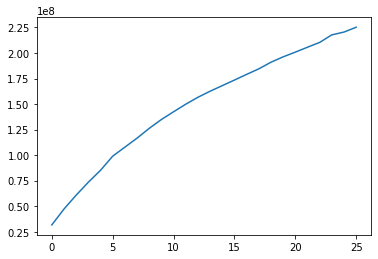

In [62]:
#plot the views vs. trending days
plt.plot(x_num,y)
plt.show()